
# **Forecast the consumption of electricity in coming future**


**Device: AC csv for 2022 and 2023**

In [ ]:
import csv
import random
from datetime import date, timedelta

start_date = date(2022, 1, 1)
end_date = date(2022, 12, 31)

with open('ac.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Date', 'Watt'])

    current_date = start_date
    while current_date <= end_date:
        watt = random.randint(100, 500)
        writer.writerow([current_date, watt])
        current_date += timedelta(days=1)

In [ ]:
import csv
import random
from datetime import date, timedelta

start_date = date(2023, 1, 1)
end_date = date(2023, 12, 31)

with open('ac_2023.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Date', 'Watt'])

    current_date = start_date
    while current_date <= end_date:
        watt = random.randint(100, 500)
        writer.writerow([current_date, watt])
        current_date += timedelta(days=1)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
# Load data
df_2022 = pd.read_csv('/content/ac.csv')
df_2023 = pd.read_csv('/content/ac_2023.csv')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df_2022

,Date,Watt
0,2022-01-01,186
1,2022-01-02,496
2,2022-01-03,128
3,2022-01-04,106
4,2022-01-05,482
...,...,...
360,2022-12-27,410
361,2022-12-28,247
362,2022-12-29,183
363,2022-12-30,171


In [ ]:
# Load data and convert 'Date' column to datetime
df_2022 = pd.read_csv('ac.csv', parse_dates=['Date'])
df_2023 = pd.read_csv('ac_2023.csv', parse_dates=['Date'])

# Now the .dt accessor will work
df_2022['Date'].dt.month

0       1
1       1
2       1
3       1
4       1
       ..
360    12
361    12
362    12
363    12
364    12
Name: Date, Length: 365, dtype: int64

# **EDA**

Text(0.5, 1.0, 'Average Daily Power Usage')

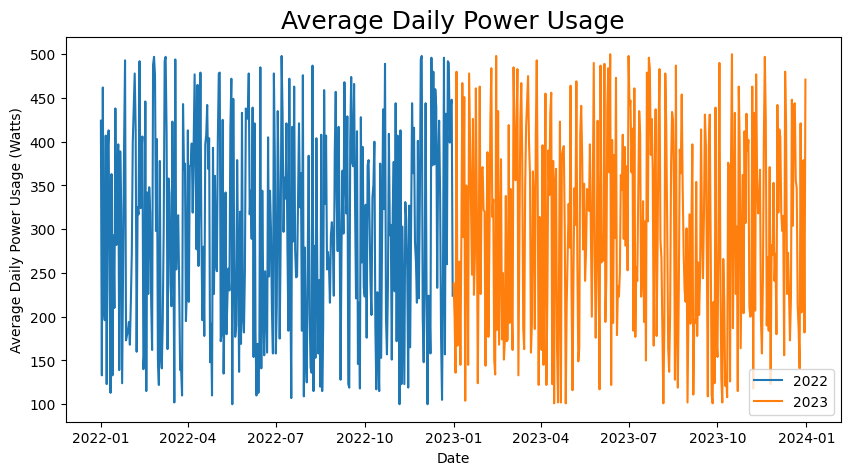

In [ ]:
# Plot daily average power usage
plt.figure(figsize=(10,5))
df_2022.groupby(df_2022['Date'].dt.date)['Watt'].mean().plot(label='2022')
df_2023.groupby(df_2023['Date'].dt.date)['Watt'].mean().plot(label='2023')
plt.ylabel('Average Daily Power Usage (Watts)')
plt.legend()
plt.title('Average Daily Power Usage', size=18)

Text(0.5, 1.0, 'Average Monthly Power Usage')

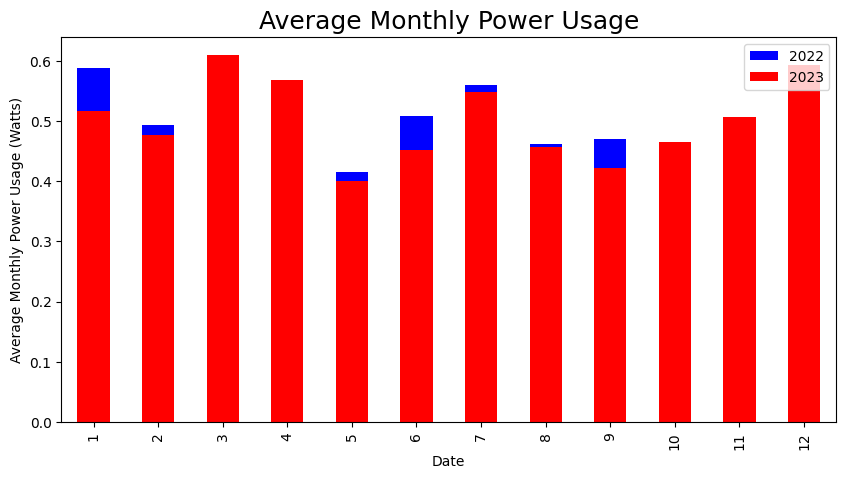

In [ ]:
# Plot monthly average usage
plt.figure(figsize=(10,5))
df_2022.groupby(df_2022['Date'].dt.month)['Watt'].mean().plot(kind='bar',color='b', label='2022')
df_2023.groupby(df_2023['Date'].dt.month)['Watt'].mean().plot(kind='bar',color='r', label='2023')
plt.ylabel('Average Monthly Power Usage (Watts)')
plt.legend()
plt.title('Average Monthly Power Usage', size=18)

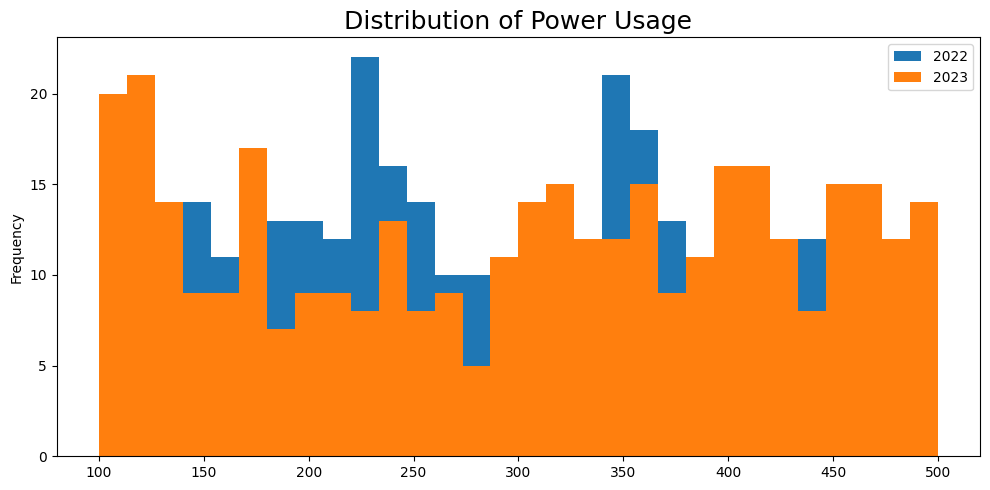

In [ ]:
# Plot distribution
plt.figure(figsize=(10,5))
df_2022['Watt'].plot(kind='hist', bins=30, label='2022')
df_2023['Watt'].plot(kind='hist', bins=30, label='2023')
plt.legend()
plt.title('Distribution of Power Usage', size=18)

plt.tight_layout()
plt.show()

In [ ]:
# Preprocess data
scaler = MinMaxScaler()
df_2022['Watt'] = scaler.fit_transform(df_2022[['Watt']])
df_2023['Watt'] = scaler.fit_transform(df_2023[['Watt']])

In [ ]:
# Train/test split
train_2022, test_2022 = train_test_split(df_2022, test_size=0.2)
train_2023, test_2023 = train_test_split(df_2023, test_size=0.2)

In [ ]:
# Build LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [ ]:
# Train model on 2022 data
X_train_2022 = train_2022[['Watt']].values.reshape(-1,1,1)
y_train_2022 = train_2022['Watt'].values
model.fit(X_train_2022, y_train_2022, epochs=50)

Epoch 1/50
10/10 [==============================] - 2s 3ms/step - loss: 0.3125
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2599
Epoch 3/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2112
Epoch 4/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1672
Epoch 5/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1293
Epoch 6/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0950
Epoch 7/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0682
Epoch 8/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0504
Epoch 9/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0385
Epoch 10/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0326
Epoch 11/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0295
Epoch 12/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0277
Epoch 13/50
10/10 [==============================

In [ ]:
# Forecast on 2023 test data
X_test_2023 = test_2023[['Watt']].values.reshape(-1,1,1)
preds_2023 = model.predict(X_test_2023)

3/3 [==============================] - 0s 4ms/step


In [ ]:
preds_2023

array([[0.74201655],
       [0.15001106],
       [0.2698944 ],
       [0.21127905],
       [0.22913936],
       [0.07825407],
       [0.2046219 ],
       [0.7366349 ],
       [0.8099014 ],
       [0.59940696],
       [0.4381172 ],
       [0.08032275],
       [0.8594624 ],
       [0.36323026],
       [0.9179741 ],
       [0.834612  ],
       [0.9602044 ],
       [0.5353642 ],
       [0.41858307],
       [0.28135395],
       [0.9179741 ],
       [0.5328297 ],
       [0.09278832],
       [0.35847434],
       [0.6019955 ],
       [0.2471558 ],
       [1.0141946 ],
       [0.52271295],
       [0.18478346],
       [0.46273553],
       [0.2516842 ],
       [0.9460883 ],
       [0.71785825],
       [0.41372204],
       [0.04145491],
       [0.7853331 ],
       [0.16731758],
       [0.08239398],
       [0.34190172],
       [0.7501027 ],
       [0.9857107 ],
       [0.604586  ],
       [0.19578014],
       [0.6201721 ],
       [0.15648228],
       [0.16297601],
       [0.10324618],
       [0.793

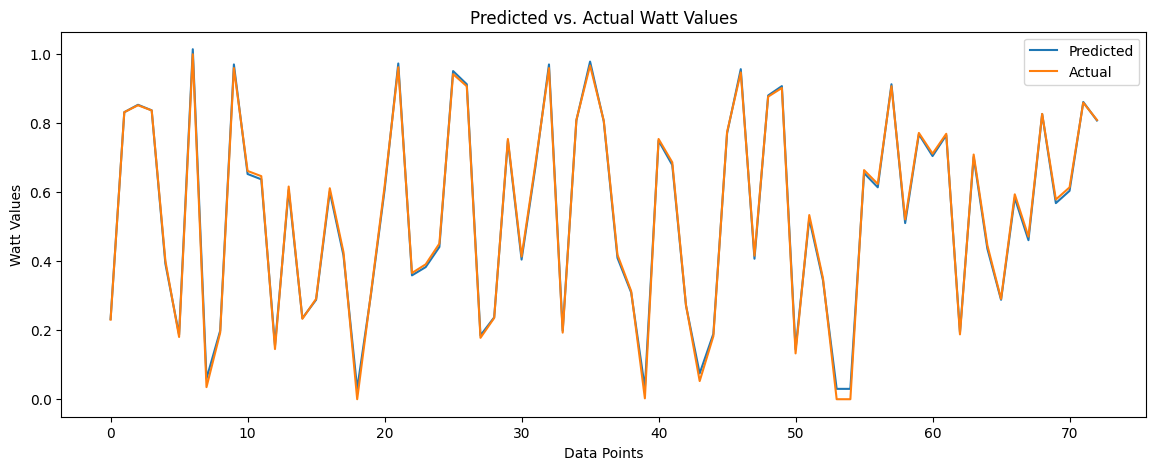

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(preds_2023, label='Predicted')
plt.plot(test_2023['Watt'].values, label='Actual')
plt.xlabel('Data Points')
plt.ylabel('Watt Values')
plt.title('Predicted vs. Actual Watt Values')
plt.legend()
plt.show()

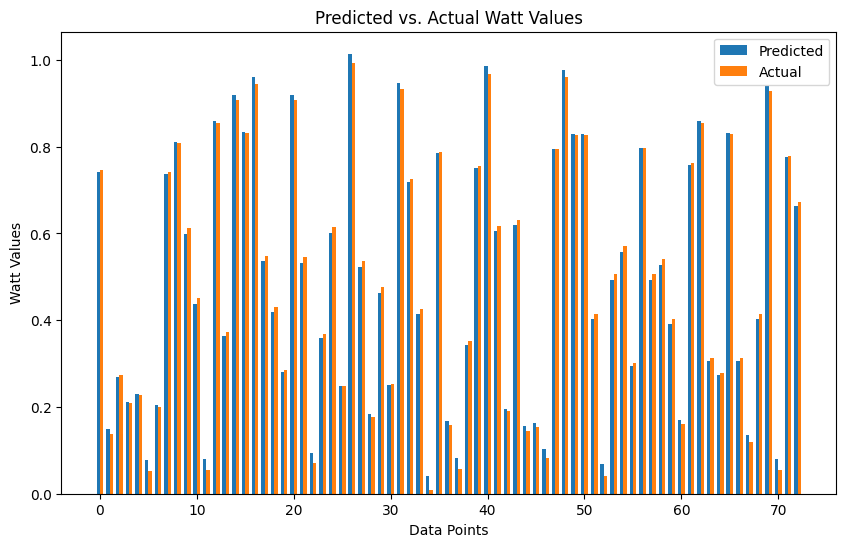

In [ ]:
preds_2023 = [float(value) for value in preds_2023]

# Create an array for x-axis values (data points)
x = np.arange(len(test_2023['Watt'].values))

plt.figure(figsize=(10, 6))
width = 0.35
plt.bar(x - width/2, preds_2023, width, label='Predicted')
plt.bar(x + width/2, test_2023['Watt'].values, width, label='Actual')
plt.xlabel('Data Points')
plt.ylabel('Watt Values')
plt.title('Predicted vs. Actual Watt Values')
plt.legend()
plt.show()

In [ ]:
# Calculate RMSE
import numpy as np
mse = mean_squared_error(preds_2023, test_2023['Watt'].values)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

RMSE: 0.012745544886263536


In [ ]:
# Assuming you have preds_2023 and test_2023['Watt'].values
data = {'Predicted': preds_2023, 'Actual': test_2023['Watt'].values}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('ac_pred.csv', index=False)

**Device: Charging_Port (CP) csv for 2022 and 2023**

In [ ]:
import csv
import random
from datetime import date, timedelta

start_date = date(2023, 1, 1)
end_date = date(2023, 12, 31)

with open('charging_2023.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Date', 'Watt'])

    current_date = start_date
    while current_date <= end_date:
        watt = random.randint(40, 200)
        writer.writerow([current_date, watt])
        current_date += timedelta(days=1)

In [ ]:
import csv
import random
from datetime import date, timedelta

start_date = date(2022, 1, 1)
end_date = date(2022, 12, 31)

with open('charging_2022.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Date', 'Watt'])

    current_date = start_date
    while current_date <= end_date:
        watt = random.randint(40, 330)
        writer.writerow([current_date, watt])
        current_date += timedelta(days=1)

Text(0.5, 1.0, 'Daily Average Charging')

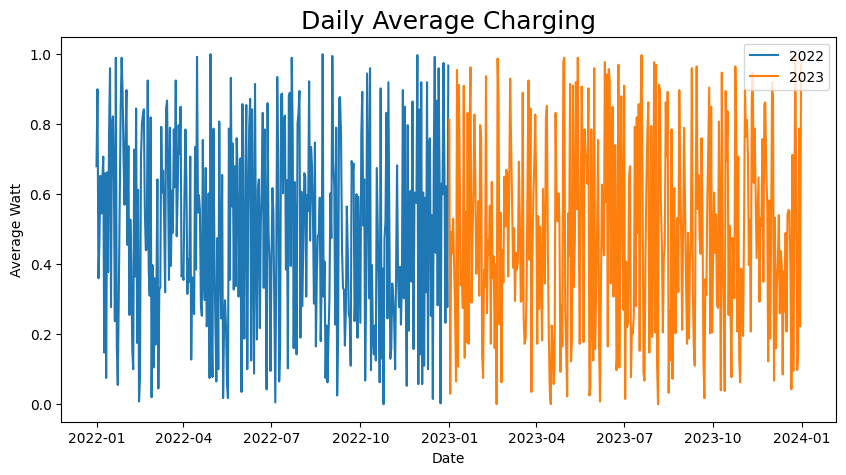

In [ ]:
# Daily average charging
plt.figure(figsize=(10,5))
df_2022_charge.groupby(df_2022['Date'].dt.date)['Watt'].mean().plot(label='2022')
df_2023_charge.groupby(df_2023['Date'].dt.date)['Watt'].mean().plot(label='2023')
plt.legend()
plt.ylabel('Average Watt')
plt.title('Daily Average Charging', size=18)

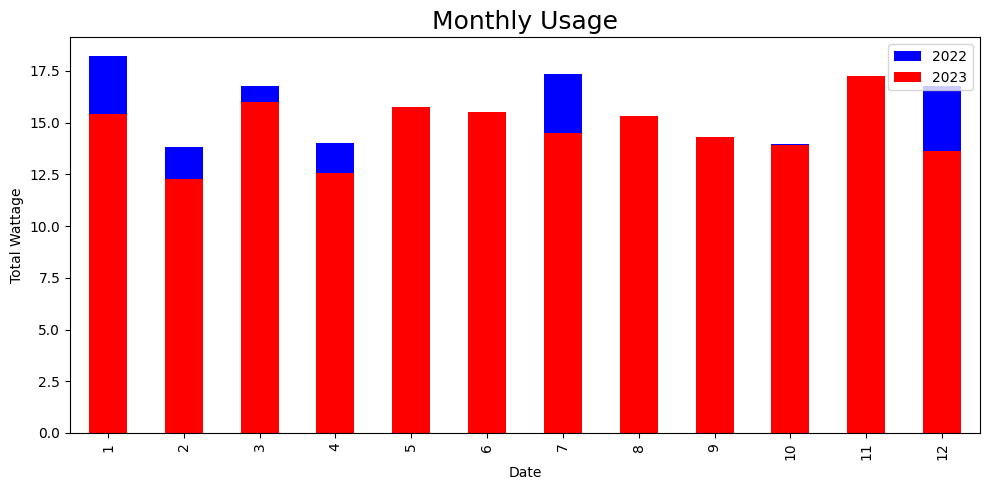

In [ ]:
# Monthly usage
plt.figure(figsize=(10,5))
df_2022_charge.groupby(df_2022['Date'].dt.month)['Watt'].sum().plot(kind='bar',color='b', label='2022')
df_2023_charge.groupby(df_2023['Date'].dt.month)['Watt'].sum().plot(kind='bar',color='r', label='2023')
plt.ylabel('Total Wattage')
plt.legend()
plt.title('Monthly Usage', size=18)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Charging Distribution')

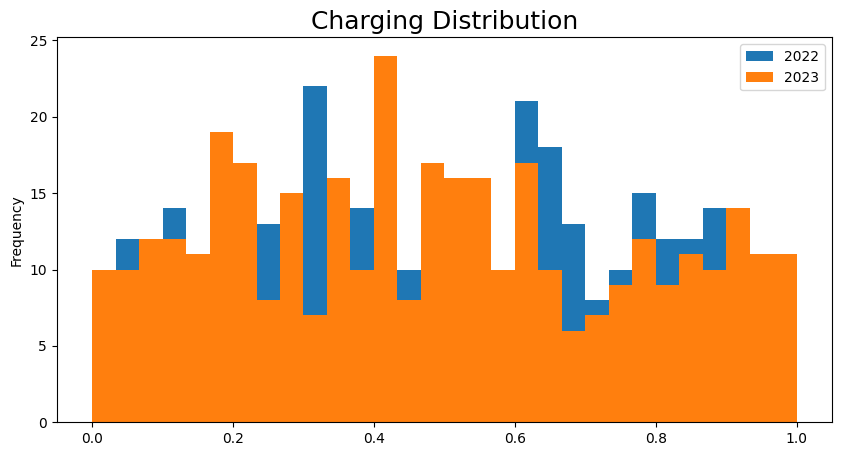

In [ ]:
# Charging distribution
plt.figure(figsize=(10,5))
df_2022_charge['Watt'].plot(kind='hist',bins=30, label='2022')
df_2023_charge['Watt'].plot(kind='hist',bins=30, label='2023')
plt.legend()
plt.title('Charging Distribution', size=18)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load data
df_2022_charge = pd.read_csv('/content/charging_2022.csv')
df_2023_charge = pd.read_csv('/content/charging_2023.csv')

# Preprocess
scaler = MinMaxScaler()
df_2022_charge[['Watt']] = scaler.fit_transform(df_2022_charge[['Watt']])
df_2023_charge[['Watt']] = scaler.fit_transform(df_2023_charge[['Watt']])

# Train/test split
train_2022, test_2022 = train_test_split(df_2022_charge, test_size=0.2)
train_2023, test_2023 = train_test_split(df_2023_charge, test_size=0.2)

# Build LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(1,1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# Train on 2022 data
X_train_2022 = train_2022['Watt'].values.reshape(-1,1,1)
y_train_2022 = train_2022['Watt'].values
model.fit(X_train_2022, y_train_2022, epochs=50)

# Predict 2023 data
X_test_2023 = test_2023['Watt'].values.reshape(-1,1,1)
preds_2023 = model.predict(X_test_2023)

# Calculate RMSE
mse = mean_squared_error(preds_2023, test_2023['Watt'].values)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

Epoch 1/50
10/10 [==============================] - 2s 3ms/step - loss: 0.3087
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2555
Epoch 3/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2095
Epoch 4/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1670
Epoch 5/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1313
Epoch 6/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1001
Epoch 7/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0746
Epoch 8/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0556
Epoch 9/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0425
Epoch 10/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0353
Epoch 11/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0319
Epoch 12/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0297
Epoch 13/50
10/10 [==============================

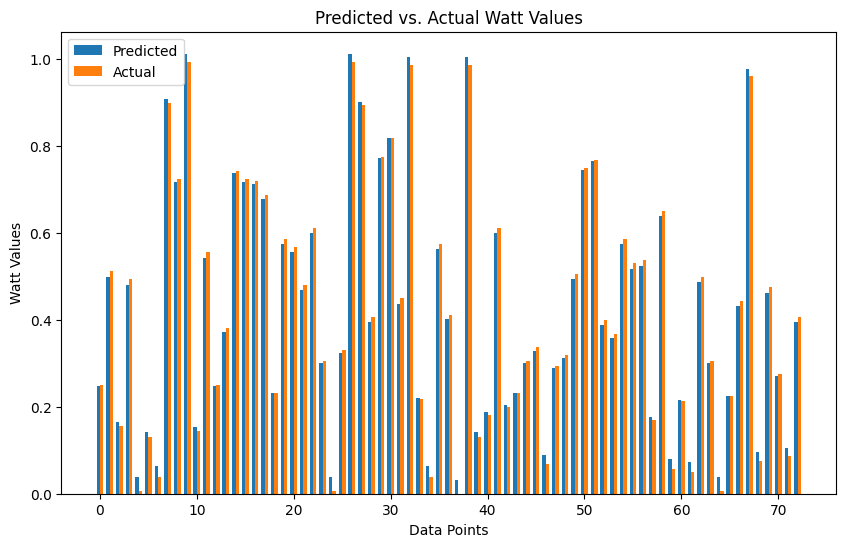

In [ ]:
preds_2023 = [float(value) for value in preds_2023]

# Create an array for x-axis values (data points)
x = np.arange(len(test_2023['Watt'].values))

plt.figure(figsize=(10, 6))
width = 0.35
plt.bar(x - width/2, preds_2023, width, label='Predicted')
plt.bar(x + width/2, test_2023['Watt'].values, width, label='Actual')
plt.xlabel('Data Points')
plt.ylabel('Watt Values')
plt.title('Predicted vs. Actual Watt Values')
plt.legend()
plt.show()

**Device: Light csv for 2022 and 2023**

In [ ]:
import csv
import random
from datetime import date, timedelta

start_date = date(2023, 1, 1)
end_date = date(2023, 12, 31)

with open('light_2023.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Date', 'Watt'])

    current_date = start_date
    while current_date <= end_date:
        watt = random.randint(300, 800)
        writer.writerow([current_date, watt])
        current_date += timedelta(days=1)

In [ ]:
import csv
import random
from datetime import date, timedelta

start_date = date(2022, 1, 1)
end_date = date(2022, 12, 31)

with open('light_2022.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Date', 'Watt'])

    current_date = start_date
    while current_date <= end_date:
        watt = random.randint(400, 700)
        writer.writerow([current_date, watt])
        current_date += timedelta(days=1)

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Daily Average Usage')

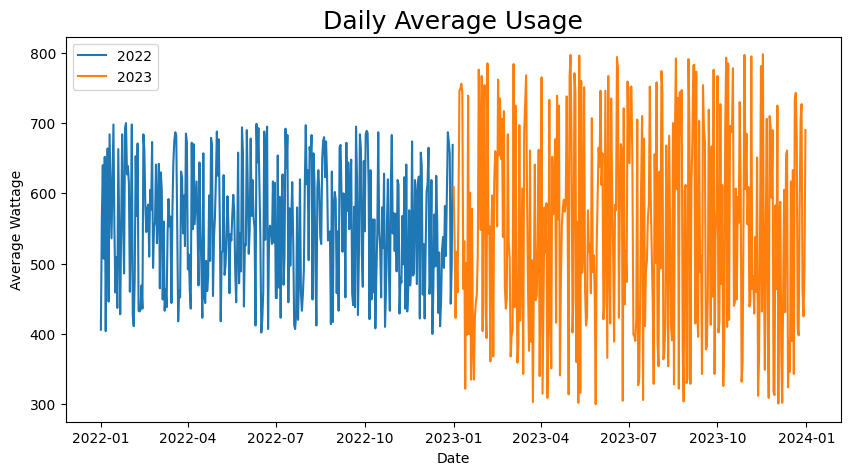

In [ ]:
df_2022_light = pd.read_csv('light_2022.csv', parse_dates=['Date'])
df_2023_light = pd.read_csv('light_2023.csv', parse_dates=['Date'])

# Daily average usage
plt.figure(figsize=(10,5))
df_2022_light.groupby(df_2022_light['Date'].dt.date)['Watt'].mean().plot(label='2022')
df_2023_light.groupby(df_2023_light['Date'].dt.date)['Watt'].mean().plot(label='2023')
plt.ylabel('Average Wattage')
plt.legend()
plt.title('Daily Average Usage', size=18)

Text(0.5, 1.0, 'Usage Distribution')

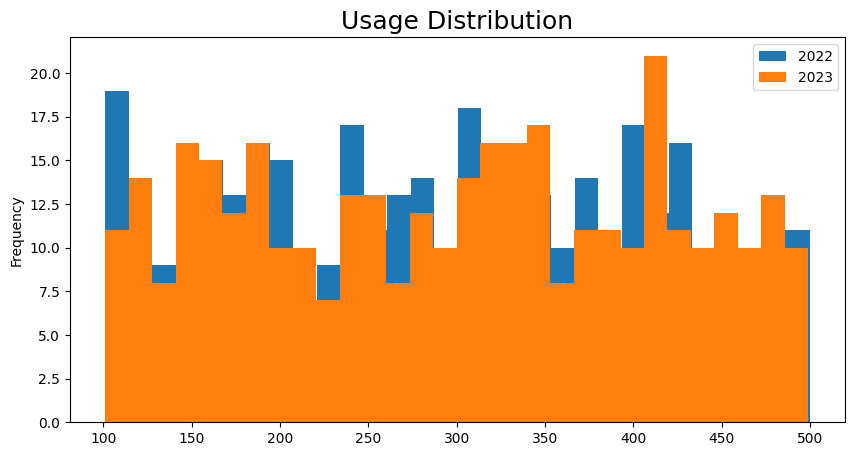

In [ ]:
# Usage distribution
plt.figure(figsize=(10,5))
df_2022_light['Watt'].plot(kind='hist', bins=30, label='2022')
df_2023_light['Watt'].plot(kind='hist', bins=30, label='2023')
plt.legend()
plt.title('Usage Distribution', size=18)

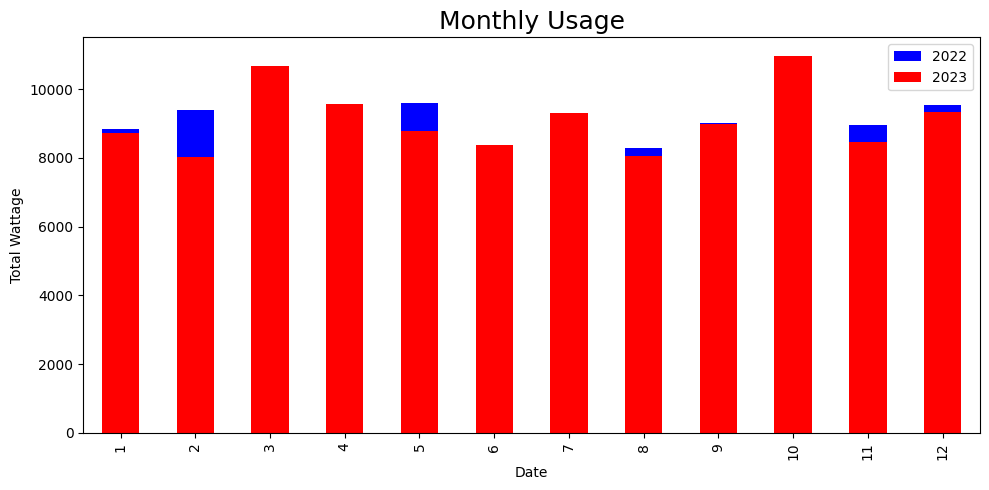

In [ ]:
# Monthly usage
plt.figure(figsize=(10,5))
df_2022_light.groupby(df_2022['Date'].dt.month)['Watt'].sum().plot(kind='bar',color='b', label='2022')
df_2023_light.groupby(df_2023['Date'].dt.month)['Watt'].sum().plot(kind='bar',color='r', label='2023')
plt.ylabel('Total Wattage')
plt.legend()
plt.title('Monthly Usage', size=18)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load data
df_2022_light = pd.read_csv('/content/light_2022.csv')
df_2023_light = pd.read_csv('/content/light_2023.csv')

# Preprocess data
scaler = MinMaxScaler()
df_2022_light['Watt'] = scaler.fit_transform(df_2022_light[['Watt']])
df_2023_light['Watt'] = scaler.fit_transform(df_2023_light[['Watt']])

# Train/test split
train_2022, test_2022 = train_test_split(df_2022_light, test_size=0.2)
train_2023, test_2023 = train_test_split(df_2023_light, test_size=0.2)

# Build LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# Train model on 2022 data
X_train_2022 = train_2022[['Watt']].values.reshape(-1,1,1)
y_train_2022 = train_2022['Watt'].values
model.fit(X_train_2022, y_train_2022, epochs=50)

# Forecast on 2023 test data
X_test_2023 = test_2023[['Watt']].values.reshape(-1,1,1)
preds_2023 = model.predict(X_test_2023)

# Calculate RMSE
mse = mean_squared_error(preds_2023, test_2023['Watt'].values)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

Epoch 1/50
10/10 [==============================] - 2s 3ms/step - loss: 0.3233
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2682
Epoch 3/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2202
Epoch 4/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1768
Epoch 5/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1388
Epoch 6/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1062
Epoch 7/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0803
Epoch 8/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0598
Epoch 9/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0451
Epoch 10/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0368
Epoch 11/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0324
Epoch 12/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0300
Epoch 13/50
10/10 [==============================

In [ ]:
preds_2023

array([[0.29767883],
       [0.3731249 ],
       [0.4058698 ],
       [0.70046383],
       [0.3865597 ],
       [0.4665951 ],
       [0.38848448],
       [0.38848448],
       [0.69411016],
       [0.51046443],
       [0.57948226],
       [0.8867071 ],
       [0.09559818],
       [0.22454679],
       [0.9870601 ],
       [0.9870601 ],
       [0.36357036],
       [0.21378133],
       [0.55903214],
       [0.47849664],
       [0.4508005 ],
       [0.05395103],
       [0.32007337],
       [0.28840917],
       [0.35215122],
       [0.04410237],
       [0.09559818],
       [0.47849664],
       [0.17828763],
       [0.9601205 ],
       [0.9088469 ],
       [0.5306122 ],
       [0.6562039 ],
       [1.0186466 ],
       [0.8143355 ],
       [0.44489956],
       [0.25899103],
       [0.40006232],
       [0.08216423],
       [0.8470978 ],
       [0.20663431],
       [0.29582202],
       [0.7861274 ],
       [0.26814392],
       [0.09897232],
       [0.08719021],
       [0.99832183],
       [0.105

In [ ]:
test_2023['Watt'].values

array([0.30260521, 0.38276553, 0.41683367, 0.70741483, 0.39679359,
       0.47895792, 0.3987976 , 0.3987976 , 0.70140281, 0.52304609,
       0.59118236, 0.87975952, 0.0741483 , 0.22244489, 0.96993988,
       0.96993988, 0.37274549, 0.21042084, 0.57114228, 0.49098196,
       0.46292585, 0.0240481 , 0.32665331, 0.29258517, 0.36072144,
       0.01202405, 0.0741483 , 0.49098196, 0.17034068, 0.94589178,
       0.8997996 , 0.54308617, 0.66533066, 0.99799599, 0.81362725,
       0.45691383, 0.26052104, 0.41082164, 0.05811623, 0.84368737,
       0.20240481, 0.3006012 , 0.78757515, 0.27054108, 0.07815631,
       0.06412826, 0.97995992, 0.08617234, 0.17034068, 0.23647295,
       0.40480962, 0.89779559, 0.35871743, 0.2004008 , 0.09018036,
       0.57114228, 0.10220441, 0.11022044, 0.75350701, 0.31462926,
       0.11623246, 0.83967936, 0.25851703, 0.27054108, 0.90380762,
       0.83767535, 0.18036072, 0.15430862, 0.88376754, 0.60921844,
       0.88376754, 0.8997996 , 0.71943888])

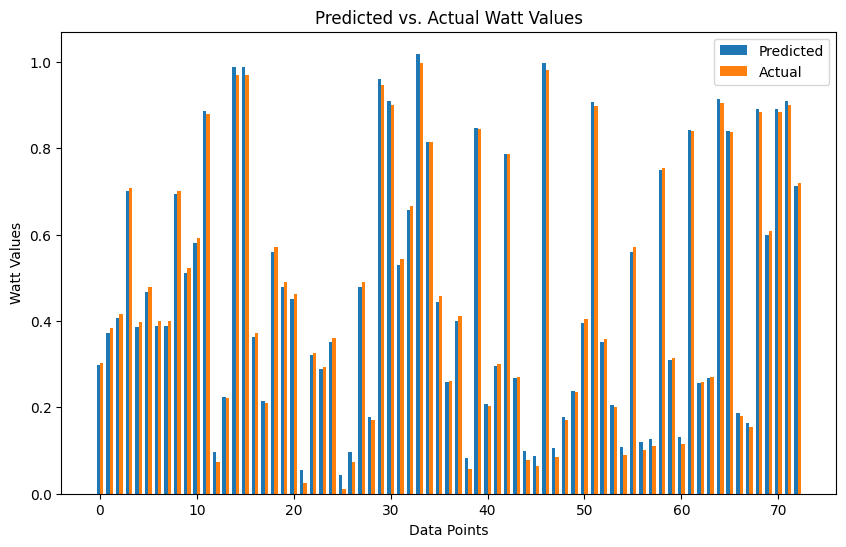

In [ ]:

# Assuming you have preds_2023 and test_2023['Watt'].values
preds_2023 = [float(value) for value in preds_2023]

# Create an array for x-axis values (data points)
x = np.arange(len(test_2023['Watt'].values))

plt.figure(figsize=(10, 6))
width = 0.35
plt.bar(x - width/2, preds_2023, width, label='Predicted')
plt.bar(x + width/2, test_2023['Watt'].values, width, label='Actual')
plt.xlabel('Data Points')
plt.ylabel('Watt Values')
plt.title('Predicted vs. Actual Watt Values')
plt.legend()
plt.show()

In [ ]:
# Assuming you have preds_2023 and test_2023['Watt'].values
data = {'Predicted': preds_2023, 'Actual': test_2023['Watt'].values}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('light_pred.csv', index=False)

**Device: Projector csv for 2022 and 2023**

In [ ]:
import csv
import random
from datetime import date, timedelta

start_date = date(2023, 1, 1)
end_date = date(2023, 12, 31)

with open('projector_2023.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Date', 'Watt'])

    current_date = start_date
    while current_date <= end_date:
        watt = random.randint(180, 470)
        writer.writerow([current_date, watt])
        current_date += timedelta(days=1)

In [ ]:
import csv
import random
from datetime import date, timedelta

start_date = date(2022, 1, 1)
end_date = date(2022, 12, 31)

with open('projector_2022.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Date', 'Watt'])

    current_date = start_date
    while current_date <= end_date:
        watt = random.randint(180, 470)
        writer.writerow([current_date, watt])
        current_date += timedelta(days=1)

Text(0.5, 1.0, 'Daily Average Usage')

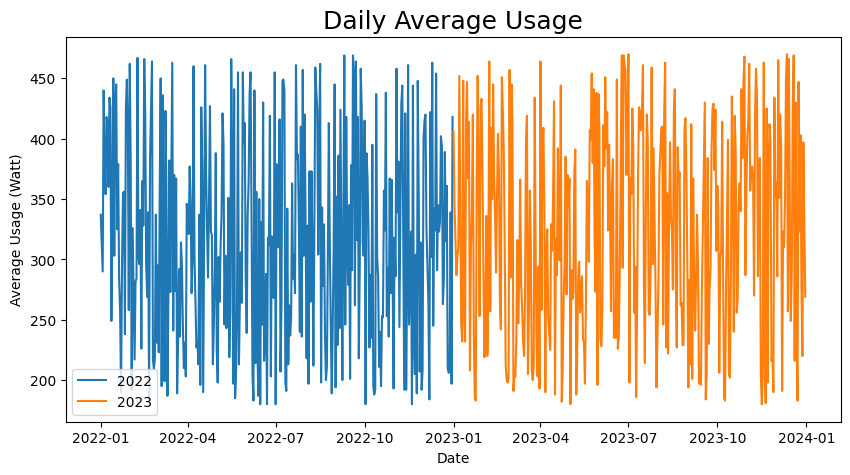

In [ ]:

df_2022_projector = pd.read_csv('projector_2022.csv', parse_dates=['Date'])
df_2023_proejector = pd.read_csv('projector_2023.csv', parse_dates=['Date'])

# Daily average usage
plt.figure(figsize=(10,5))
df_2022_projector.groupby(df_2022['Date'].dt.date)['Watt'].mean().plot(label='2022')
df_2023_projector.groupby(df_2023['Date'].dt.date)['Watt'].mean().plot(label='2023')
plt.ylabel('Average Usage (Watt)')
plt.legend()
plt.title('Daily Average Usage', size=18)

Text(0.5, 1.0, 'Usage Distribution')

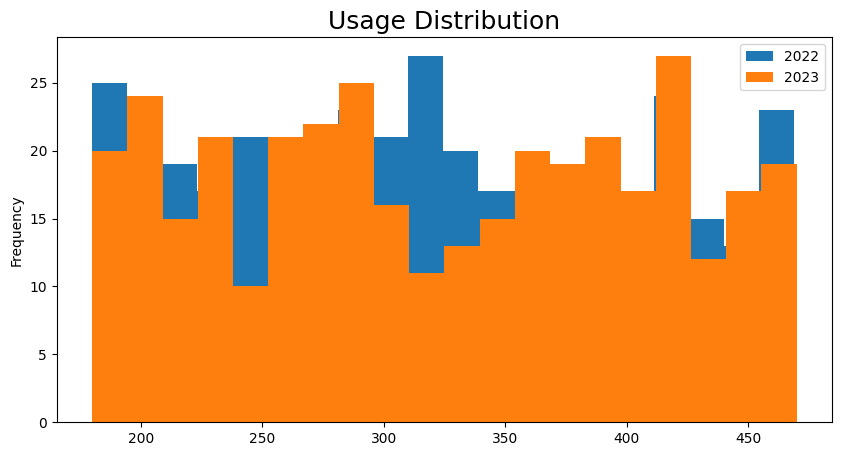

In [ ]:

# Usage distribution
plt.figure(figsize=(10,5))
df_2022_projector['Watt'].plot(kind='hist', bins=20, label='2022')
df_2023_projector['Watt'].plot(kind='hist', bins=20, label='2023')
plt.legend()
plt.title('Usage Distribution', size=18)

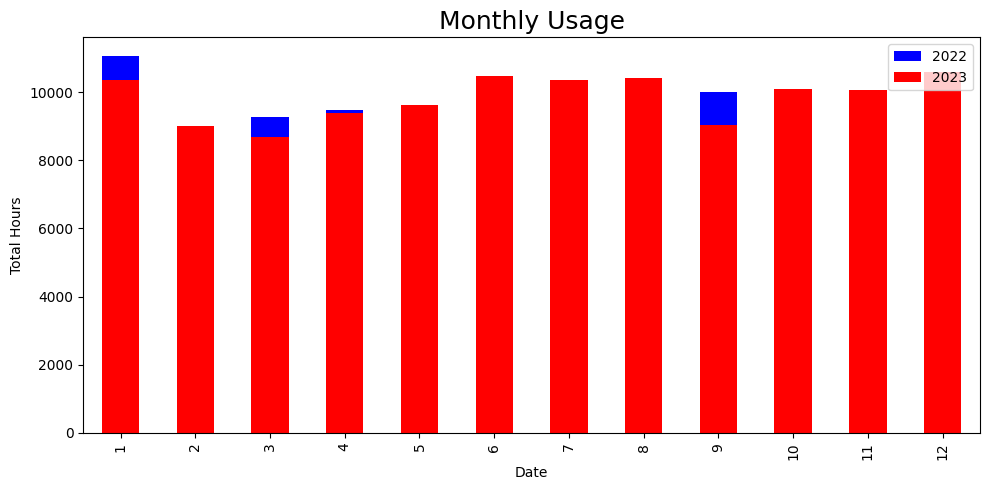

In [ ]:
# Monthly usage
plt.figure(figsize=(10,5))
df_2022_projector.groupby(df_2022['Date'].dt.month)['Watt'].sum().plot(kind='bar', color='b', label='2022')
df_2023_projector.groupby(df_2023['Date'].dt.month)['Watt'].sum().plot(kind='bar', color='r', label='2023')
plt.ylabel('Total Hours')
plt.legend()
plt.title('Monthly Usage', size=18)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load data
df_2022_projector = pd.read_csv('/content/projector_2022.csv')
df_2023_projector = pd.read_csv('/content/projector_2023.csv')

# Preprocess data
scaler = MinMaxScaler()
df_2022_projector['Watt'] = scaler.fit_transform(df_2022_projector[['Watt']])
df_2023_projector['Watt'] = scaler.fit_transform(df_2023_projector[['Watt']])

# Train/test split
train_2022, test_2022 = train_test_split(df_2022, test_size=0.2)
train_2023, test_2023 = train_test_split(df_2023, test_size=0.2)

# Build LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# Train model on 2022 data
X_train_2022 = train_2022[['Watt']].values.reshape(-1,1,1)
y_train_2022 = train_2022['Watt'].values
model.fit(X_train_2022, y_train_2022, epochs=50)

# Forecast on 2023 test data
X_test_2023 = test_2023[['Watt']].values.reshape(-1,1,1)
preds_2023 = model.predict(X_test_2023)

# Calculate RMSE
mse = mean_squared_error(preds_2023, test_2023['Watt'].values)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

Epoch 1/50
10/10 [==============================] - 2s 3ms/step - loss: 0.2932
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2423
Epoch 3/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1967
Epoch 4/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1554
Epoch 5/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1175
Epoch 6/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0875
Epoch 7/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0623
Epoch 8/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0454
Epoch 9/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0357
Epoch 10/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0298
Epoch 11/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0275
Epoch 12/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0262
Epoch 13/50
10/10 [==============================

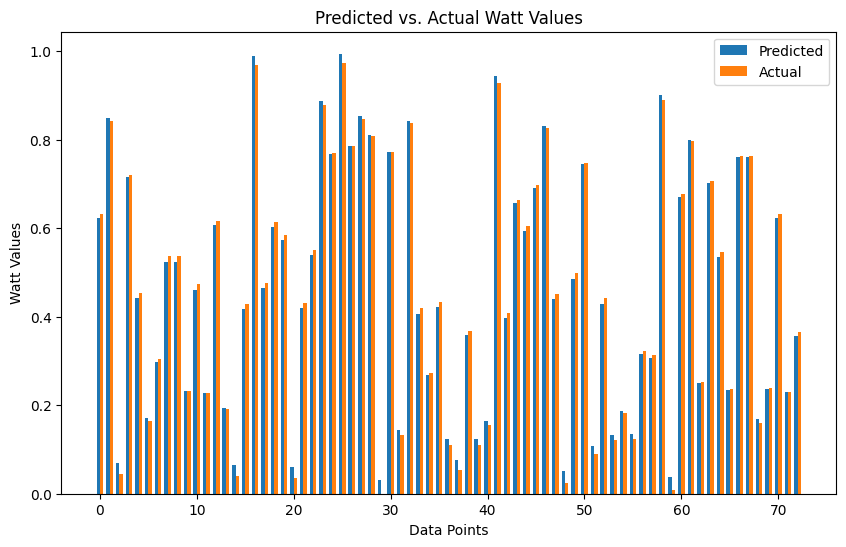

In [ ]:
# Assuming you have preds_2023 and test_2023['Watt'].values
preds_2023 = [float(value) for value in preds_2023]

# Create an array for x-axis values (data points)
x = np.arange(len(test_2023['Watt'].values))

plt.figure(figsize=(10, 6))
width = 0.35
plt.bar(x - width/2, preds_2023, width, label='Predicted')
plt.bar(x + width/2, test_2023['Watt'].values, width, label='Actual')
plt.xlabel('Data Points')
plt.ylabel('Watt Values')
plt.title('Predicted vs. Actual Watt Values')
plt.legend()
plt.show()

In [ ]:
data = {'Predicted': preds_2023, 'Actual': test_2023['Watt'].values}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('pro_pred.csv', index=False)

**Device: Otherlights csv for 2022 and 2023**

In [ ]:
import csv
import random
from datetime import date, timedelta

start_date = date(2022, 1, 1)
end_date = date(2022, 12, 31)

with open('Other_light_2022.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Date', 'Watt'])

    current_date = start_date
    while current_date <= end_date:
        watt = random.randint(90, 290)
        writer.writerow([current_date, watt])
        current_date += timedelta(days=1)

In [ ]:
import csv
import random
from datetime import date, timedelta

start_date = date(2023, 1, 1)
end_date = date(2023, 12, 31)

with open('Other_light_2023.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Date', 'Watt'])

    current_date = start_date
    while current_date <= end_date:
        watt = random.randint(90, 290)
        writer.writerow([current_date, watt])
        current_date += timedelta(days=1)

Text(0.5, 1.0, 'Daily Average Usage')

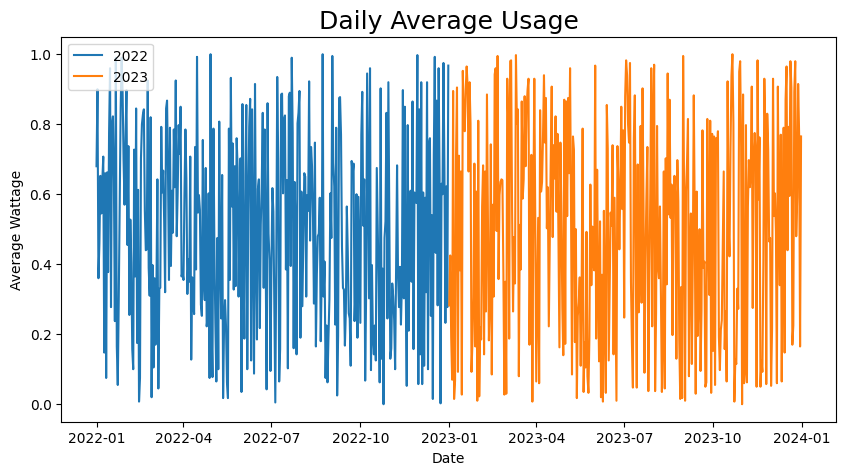

In [ ]:
df_2022_otherlights = pd.read_csv('/content/Other_light_2022.csv', parse_dates=['Date'])
df_2023_otherlights = pd.read_csv('/content/Other_light_2023.csv', parse_dates=['Date'])

# Daily average usage
plt.figure(figsize=(10,5))
df_2022.groupby(df_2022['Date'].dt.date)['Watt'].mean().plot(label='2022')
df_2023.groupby(df_2023['Date'].dt.date)['Watt'].mean().plot(label='2023')
plt.ylabel('Average Wattage')
plt.legend()
plt.title('Daily Average Usage', size=18)

Text(0.5, 1.0, 'Usage Distribution')

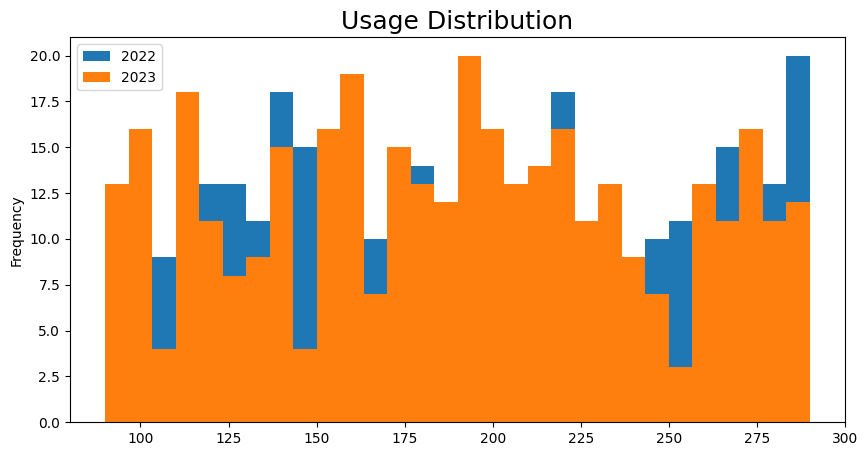

In [ ]:
# Usage distribution
plt.figure(figsize=(10,5))
df_2022_otherlights['Watt'].plot(kind='hist', bins=30, label='2022')
df_2023_otherlights['Watt'].plot(kind='hist', bins=30, label='2023')
plt.legend()
plt.title('Usage Distribution', size=18)

Text(0.5, 1.0, 'Monthly Usage')

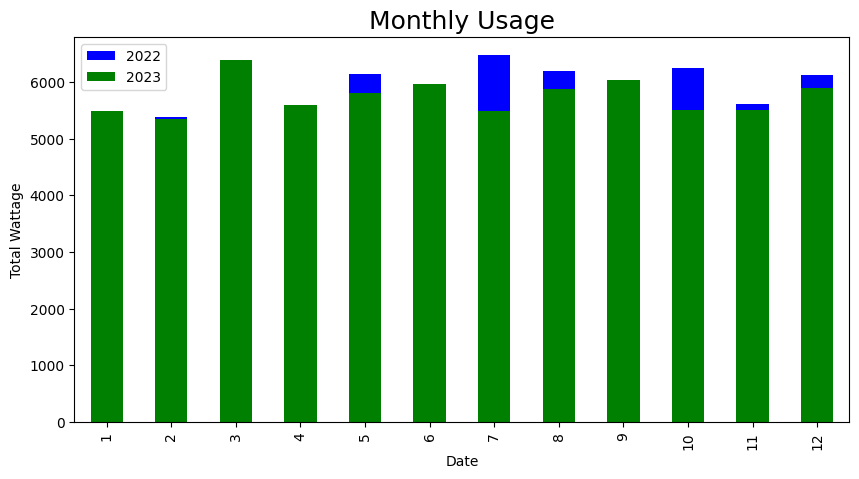

In [ ]:
# Monthly usage
plt.figure(figsize=(10,5))
df_2022_otherlights.groupby(df_2022['Date'].dt.month)['Watt'].sum().plot(kind='bar', color='blue', label='2022')
df_2023_otherlights.groupby(df_2023['Date'].dt.month)['Watt'].sum().plot(kind='bar', color='green', label='2023')
plt.ylabel('Total Wattage')
plt.legend()
plt.title('Monthly Usage', size=18)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load data
df_2022_otherlights = pd.read_csv('/content/projector_2022.csv')
df_2023_otherlights = pd.read_csv('/content/projector_2023.csv')

# Preprocess data
scaler = MinMaxScaler()
df_2022_otherlights['Watt'] = scaler.fit_transform(df_2022_otherlights[['Watt']])
df_2023_otherlights['Watt'] = scaler.fit_transform(df_2023_otherlights[['Watt']])

# Train/test split
train_2022, test_2022 = train_test_split(df_2022_otherlights, test_size=0.2)
train_2023, test_2023 = train_test_split(df_2023_otherlights, test_size=0.2)

# Build LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# Train model on 2022 data
X_train_2022 = train_2022[['Watt']].values.reshape(-1,1,1)
y_train_2022 = train_2022['Watt'].values
model.fit(X_train_2022, y_train_2022, epochs=50)

# Forecast on 2023 test data
X_test_2023 = test_2023[['Watt']].values.reshape(-1,1,1)
preds_2023 = model.predict(X_test_2023)

# Calculate RMSE
mse = mean_squared_error(preds_2023, test_2023['Watt'].values)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

Epoch 1/50
10/10 [==============================] - 2s 3ms/step - loss: 0.2934
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2431
Epoch 3/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1974
Epoch 4/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1572
Epoch 5/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1197
Epoch 6/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0895
Epoch 7/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0662
Epoch 8/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0489
Epoch 9/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0386
Epoch 10/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0328
Epoch 11/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0299
Epoch 12/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0281
Epoch 13/50
10/10 [==============================

In [ ]:
preds_2023

array([[0.14362048],
       [0.9760598 ],
       [0.61119556],
       [0.7344148 ],
       [0.5721785 ],
       [0.47827077],
       [0.7528548 ],
       [0.06432692],
       [0.5058133 ],
       [0.50927305],
       [0.25119394],
       [0.07297558],
       [0.90310574],
       [0.9567685 ],
       [0.5196746 ],
       [0.17077245],
       [0.2701644 ],
       [0.48513383],
       [0.2168132 ],
       [0.13464929],
       [0.09331375],
       [0.52662754],
       [0.9954152 ],
       [0.42055506],
       [0.2168132 ],
       [0.4817004 ],
       [0.8049016 ],
       [0.668699  ],
       [0.8311479 ],
       [0.94138277],
       [0.28289583],
       [0.08748031],
       [0.1079759 ],
       [0.37387457],
       [0.08748031],
       [0.44079763],
       [0.35739303],
       [0.8462108 ],
       [1.0187249 ],
       [0.44079763],
       [0.4817004 ],
       [0.47827077],
       [0.42728695],
       [0.27970666],
       [0.40713844],
       [0.23237655],
       [0.55809736],
       [0.164

In [ ]:
test_2023['Watt'].values

array([0.12847222, 0.96180556, 0.62152778, 0.73958333, 0.58333333,
       0.48958333, 0.75694444, 0.03472222, 0.51736111, 0.52083333,
       0.25      , 0.04513889, 0.89583333, 0.94444444, 0.53125   ,
       0.15972222, 0.27083333, 0.49652778, 0.21180556, 0.11805556,
       0.06944444, 0.53819444, 0.97916667, 0.43055556, 0.21180556,
       0.49305556, 0.80555556, 0.67708333, 0.82986111, 0.93055556,
       0.28472222, 0.0625    , 0.08680556, 0.38194444, 0.0625    ,
       0.45138889, 0.36458333, 0.84375   , 1.        , 0.45138889,
       0.49305556, 0.48958333, 0.4375    , 0.28125   , 0.41666667,
       0.22916667, 0.56944444, 0.15277778, 0.57291667, 0.29861111,
       0.72916667, 0.73263889, 0.72916667, 0.92361111, 0.26388889,
       0.58333333, 0.61805556, 0.20833333, 0.14583333, 0.26041667,
       0.22222222, 0.24305556, 0.11805556, 0.98263889, 0.76388889,
       0.03819444, 0.9375    , 0.125     , 0.12152778, 0.99652778,
       0.65625   , 0.99652778, 0.80902778])

In [ ]:
import numpy as np

preds_2023 = np.array(preds_2023).flatten()
actual_values = np.array(test_2023['Watt'].values).flatten()


In [ ]:

# Assuming you have preds_2023 and test_2023['Watt'].values
data = {'Predicted': preds_2023, 'Actual': test_2023['Watt'].values}

df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('otherlights_pred.csv', index=False)

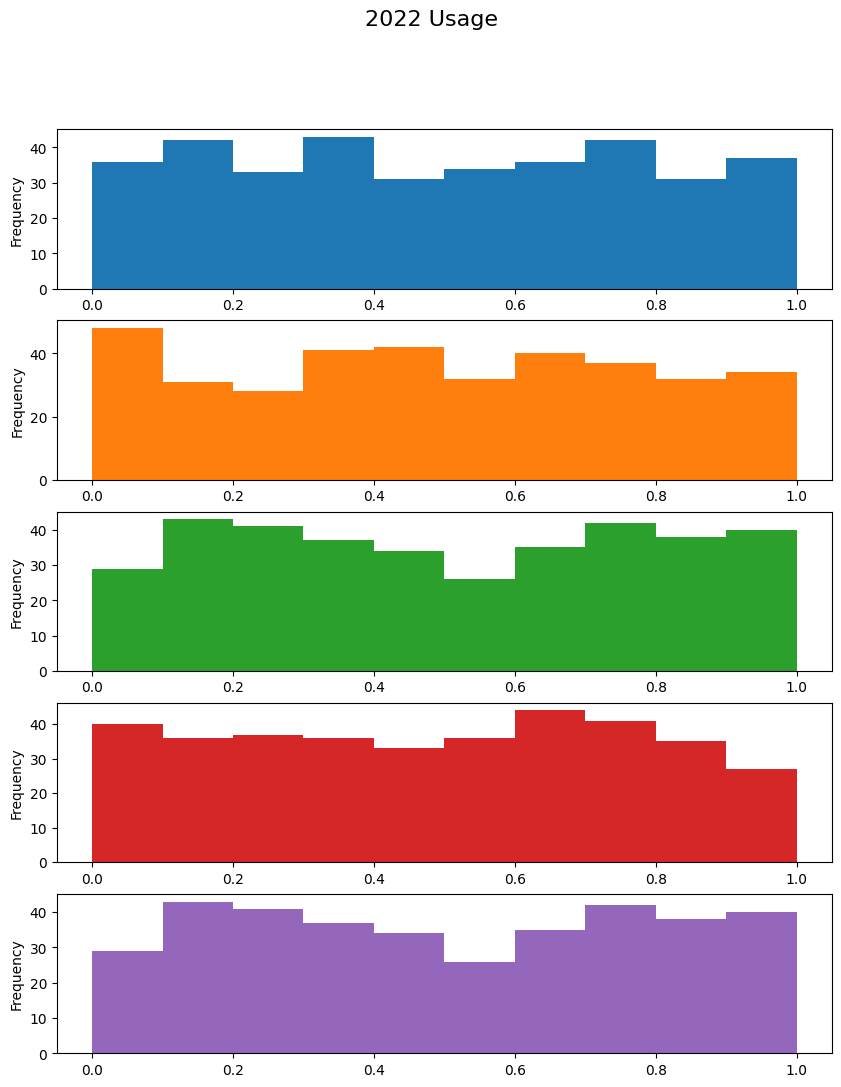

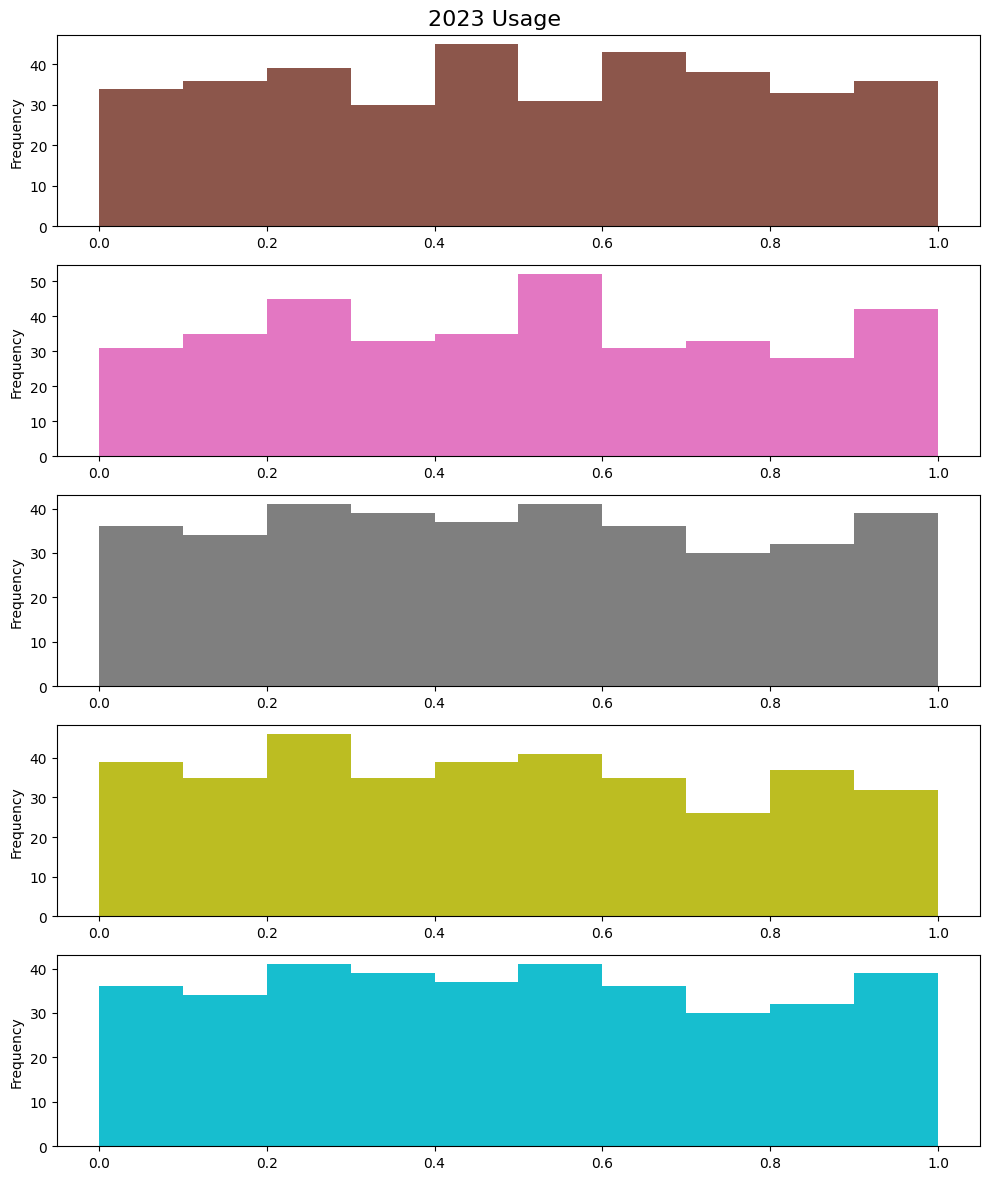

In [ ]:
##Visualization of all 2022 and 2023 years
import pandas as pd
import seaborn as sns

# Load data
df_2022_list = [df_2022, df_2022_charge, df_2022_projector, df_2022_light, df_2022_otherlights]
df_2023_list = [df_2023, df_2023_charge, df_2023_projector, df_2023_light, df_2023_otherlights]


# Color palettes
colors_2022 = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD']
colors_2023 = ['#8C564B', '#E377C2', '#7F7F7F', '#BCBD22', '#17BECF']

# Plot 2022 histograms
fig, axs = plt.subplots(nrows=5, figsize=(10,12))
for i, df in enumerate(df_2022_list):
    df.Watt.plot.hist(ax=axs[i], color=colors_2022[i])
fig.suptitle('2022 Usage', size=16)

# Plot 2023 histograms
fig, axs = plt.subplots(nrows=5, figsize=(10,12))
for i, df in enumerate(df_2023_list):
    df.Watt.plot.hist(ax=axs[i], color=colors_2023[i])
fig.suptitle('2023 Usage', size=16)

plt.tight_layout()
plt.show()